In [53]:
#Step 1: Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import re

In [54]:
#Step 2: Reading the data
data = pd.read_csv("C:\\Users\\INDIA AI DATA LAB\\Downloads\\Sleep health and lifestyle\\Sleep_health_and_lifestyle_dataset.csv")

In [55]:
#Checking the dimensions of data
shape = data.shape
print("Shape of the data is:", shape)

Shape of the data is: (374, 13)


In [56]:
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [57]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [59]:
#Step 3: Data Cleaning 
data.isnull().sum()
#Check for missing values

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [60]:
#There are 219 null values in the column 'Sleep Disorder', replacing those values with 'None'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
print(data['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [61]:
#Removing Person ID column as it's not useful
data = data.drop(['Person ID'], axis=1)
data.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [62]:
#Handling categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])
data['Occupation'] = LE.fit_transform(data['Occupation']) 
data['BMI Category'] = LE.fit_transform(data['BMI Category'])
data['Blood Pressure'] = LE.fit_transform(data['Blood Pressure'])
data['Sleep Disorder'] = LE.fit_transform(data['Sleep Disorder'])

In [63]:
#Step 4: Exploratory Data Analysis
data.describe().style.background_gradient(cmap='GnBu', axis=0)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,13.114973,70.165775,6816.844920,1.002674
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,7.100590,4.135676,1617.915679,0.644626
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,9.000000,68.000000,5600.000000,1.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,15.000000,70.000000,7000.000000,1.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,20.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,24.000000,86.000000,10000.000000,2.000000


In [64]:
#Histogram to visualise the distribution of people who have Sleep Disorder
fig = px.histogram(data, x="Sleep Disorder",  histfunc="count", color = 'Sleep Disorder', title='Distribution of people who have Sleep Disorder')
fig.show()

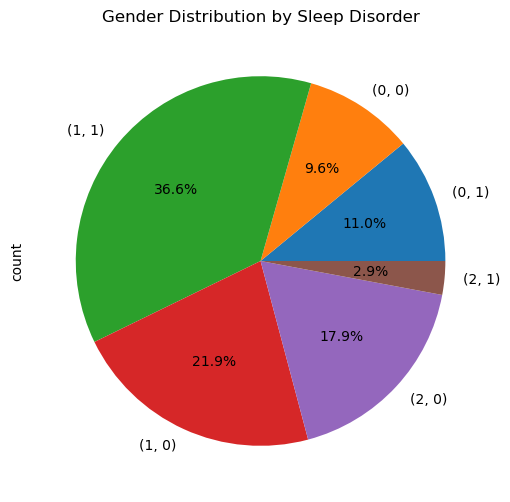

In [65]:
#Pie chart to visualise gender ratio in sleep disorder categories
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Gender Distribution by Sleep Disorder')
plt.show()

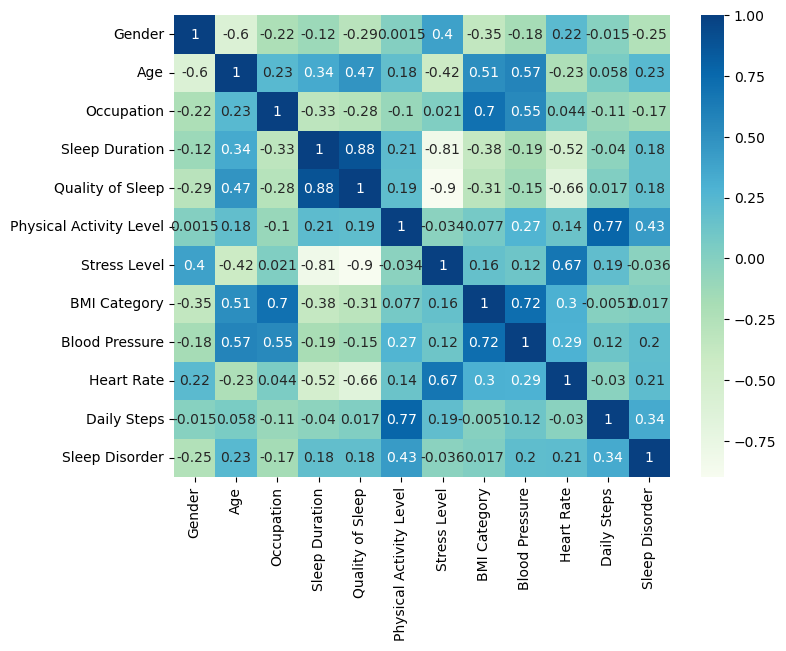

In [66]:
#Step 5: Feature Selection
#Correlation Matrix
correlation = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, cmap= 'GnBu')
plt.show()

In [67]:
#Identifying the features and target
features = []
for col in data:
    if col != 'Sleep Disorder' and col != 'Gender' and col != 'Occupation' and col != 'Stress Level':
        features.append(col)
target = 'Sleep Disorder'       
X = data[features]
Y = data[target]

In [68]:
#Step 6: Data Splitting
#Splitting the dataset into 75:25 ratio, 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [69]:
#Step 7: Data Modeling and Training
#Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [70]:
#Model Prediction
Y_pred_rfc = rfc.predict(X_test)

In [71]:
#Step 8: Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(Y_test, Y_pred_rfc)

array([[ 9,  2,  5],
       [ 0, 57,  1],
       [ 3,  3, 14]], dtype=int64)

In [73]:
print("Classification report of Random Forest Classifier:")
print(classification_report(Y_test, Y_pred_rfc))

Classification report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.92      0.98      0.95        58
           2       0.70      0.70      0.70        20

    accuracy                           0.85        94
   macro avg       0.79      0.75      0.76        94
weighted avg       0.84      0.85      0.84        94



In [74]:
rfc_score = colored(round(rfc.score(X_test, Y_test)*100,2), "blue")
print('Accuracy score of Random Forest Classifier is:', rfc_score)

Accuracy score of Random Forest Classifier is: 85.11


In [75]:
#Model 2: Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [76]:
Y_pred_dtc = dtc.predict(X_test)

In [77]:
#Model Evaluation
confusion_matrix(Y_test, Y_pred_dtc)

array([[11,  2,  3],
       [ 0, 57,  1],
       [ 1,  3, 16]], dtype=int64)

In [78]:
#Classification report based on confusion matrix
print("Classification report of Decision Tree Classifier:")
print(classification_report(Y_test, Y_pred_dtc))

Classification report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.92      0.98      0.95        58
           2       0.80      0.80      0.80        20

    accuracy                           0.89        94
   macro avg       0.88      0.82      0.85        94
weighted avg       0.89      0.89      0.89        94



In [79]:
dtc_score = colored(round(dtc.score(X_test, Y_test)*100,2) , "red")
print('Accuracy score of Decision Tree Classifier is:', dtc_score)

Accuracy score of Decision Tree Classifier is: 89.36


In [80]:
#Model 3: Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [81]:
Y_pred_gnb = gnb.predict(X_test)

In [82]:
confusion_matrix(Y_test, Y_pred_gnb)

array([[14,  1,  1],
       [ 4, 53,  1],
       [ 2,  2, 16]], dtype=int64)

In [83]:
#Classification report based on confusion matrix
print("Classification report of Gaussian Naive Bayes:")
print(classification_report(Y_test, Y_pred_gnb))

Classification report of Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.95      0.91      0.93        58
           2       0.89      0.80      0.84        20

    accuracy                           0.88        94
   macro avg       0.85      0.86      0.85        94
weighted avg       0.89      0.88      0.89        94



In [84]:
gnb_score = colored(round(gnb.score(X_test, Y_test)*100,2) , "blue")
print('Accuracy score of Gaussian Naive Bayes is:', gnb_score)

Accuracy score of Gaussian Naive Bayes is: 88.3


In [85]:
#Model 4: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [86]:
Y_pred_knn = knn.predict(X_test)

In [87]:
confusion_matrix(Y_test, Y_pred_knn)

array([[14,  1,  1],
       [ 4, 53,  1],
       [ 2,  2, 16]], dtype=int64)

In [88]:
print("Classification report of K Neighbors Classifier:")
print(classification_report(Y_test, Y_pred_knn))

Classification report of K Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.88      0.91      0.90        58
           2       0.57      0.60      0.59        20

    accuracy                           0.79        94
   macro avg       0.72      0.69      0.70        94
weighted avg       0.78      0.79      0.78        94



In [89]:
knn_score = colored(round(knn.score(X_test, Y_test)*100,2) , "green")
print('Accuracy score of Gaussian Naive Bayes is:', knn_score)

Accuracy score of Gaussian Naive Bayes is: 78.72


In [90]:
#Model 5: XGB
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [91]:
Y_pred_xgb = xgb.predict(X_test)

In [92]:
confusion_matrix(Y_test, Y_pred_xgb)

array([[ 9,  2,  5],
       [ 0, 57,  1],
       [ 1,  3, 16]], dtype=int64)

In [93]:
print("Classification report of XGB Classifier:")
print(classification_report(Y_test, Y_pred_xgb))

Classification report of XGB Classifier:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.92      0.98      0.95        58
           2       0.73      0.80      0.76        20

    accuracy                           0.87        94
   macro avg       0.85      0.78      0.80        94
weighted avg       0.88      0.87      0.87        94



In [94]:
xgb_score = colored(round(xgb.score(X_test, Y_test)*100,2) , "magenta")
print('Accuracy score of XGB Classifier is:', xgb_score)

Accuracy score of XGB Classifier is: 87.23


In [95]:
#Model 6: SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [96]:
Y_pred_svc = svc.predict(X_test)

In [97]:
confusion_matrix(Y_test, Y_pred_svc)

array([[ 0, 15,  1],
       [ 0, 56,  2],
       [ 3, 11,  6]], dtype=int64)

In [98]:
print("Classification report of Support Vector Classifier:")
print(classification_report(Y_test, Y_pred_svc))

Classification report of Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.68      0.97      0.80        58
           2       0.67      0.30      0.41        20

    accuracy                           0.66        94
   macro avg       0.45      0.42      0.40        94
weighted avg       0.56      0.66      0.58        94



In [99]:
svc_score = colored(round(svc.score(X_test, Y_test)*100,2) , "magenta")
print('Accuracy score of Support Vector Classifier is:', svc_score)

Accuracy score of Support Vector Classifier is: 65.96


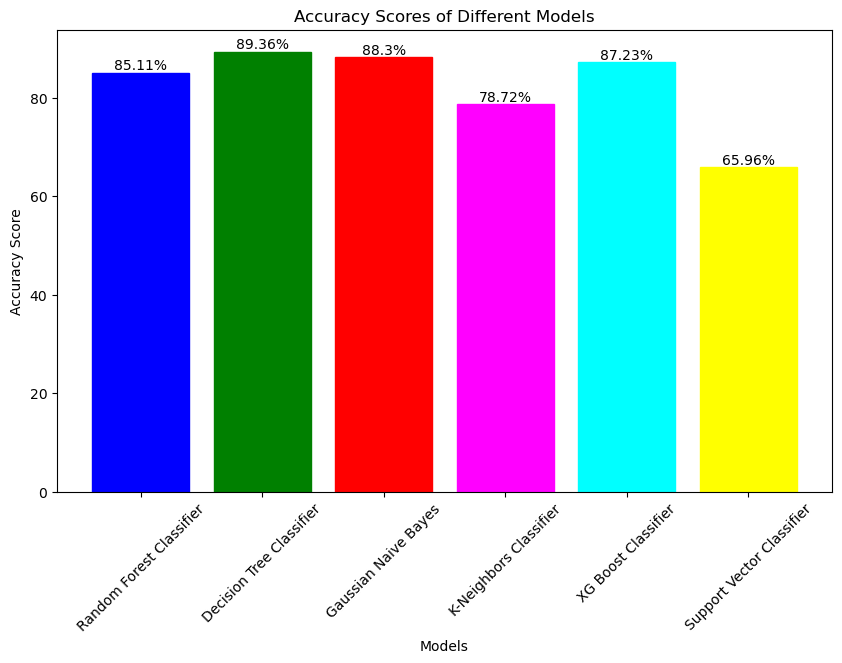

In [100]:
#Dictionary to store model names and their scores
accuracy_scores = {
    'Random Forest Classifier': rfc_score,
    'Decision Tree Classifier': dtc_score,
    'Gaussian Naive Bayes': gnb_score,
    'K-Neighbors Classifier': knn_score,
    'XG Boost Classifier': xgb_score,
    'Support Vector Classifier': svc_score
}

# Extracting numerical values from colored strings
for model, score in accuracy_scores.items():
    numerical_score = float(re.sub(r'\x1b\[\d+m', '', score))  # Remove escape characters
    accuracy_scores[model] = numerical_score


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'magenta','cyan','yellow','orange' ]  # Colors corresponding to each model
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values())
for bar, color in zip(bars, colors):
    bar.set_color(color)
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  
plt.show()

In [ ]:
Gender with stress level(Done)
Age with BP, BMI 
(Age with Sleep Duration is done, Quality of Sleep isnt playing an impressive role here)
Occupation with BP, BMI (Done)
#Sleep duration with quality of sleep (they are almost same values)
Physical activity level with BP, sleep duration(done)
Stress level with heart rate(0.67)
BMI with BP
#Age, sleep duration and stress level" Sleep Between the age of 40 and 45, sleep duration increases and so does stress level. It might be because of increased responsibilities

In [ ]:
Observations:
1. Out of 374 people, people who are in None category i.e.no sleep disorder are in majority.
2. In our data, population of females(49.4%) is almost same as male percentage(50.5%)
3. As per the pie chart, males are slighly more prone to having Insomnia whereas females tend to have Sleep apnea more than males. The none category is suggesting females are in minority when it comes to not having any sleep disorder. Gender-based differences in circadian rhythms make females more sensitive to the effects of staying awake for a long time. Women are also at increased risk for certain mental health conditions, such as anxiety and depression, which can exacerbate sleep issues. 
4. Graph suggests males in majority who are affected by stress leading to high stress levels. Reason might be due to family responsibilities, financial insecurities, debts, paying bills and pressure to perform well in life.
5. As per the table, accountants, doctors, engineers and lawyers have normal BMI whereas salesperson and nurses are in overweighjt BMI category. 
6. As per the bar graph, people who have good quality of sleep arent affected by any sleep disorder whereas when they have less quality of sleep, they are more pprone to having sleep disorders.
7. As a general fact and also as per our data, physical activity can help to reduce sleep disorders such as insomnia, daytime sleepiness and sleep apnea. But being physically fit peopl does have sleep apnea as natural shape and structure of your airway (your nose and throat) plays a big role in your chance of developing sleep apnea.
8. Data suggests a salesperson suffers from insomnia more than others whereas nurses are more prone to sleep apnea than others and doctors have the majority of developing no sleep disorder. 

In [ ]:
Distribution of people who have sleep disorder or not
Overall gender distribution in data
Gender and sleep disorder
Comparison of Gender with stress level
Age, sleep duration and stress level
sleep disorder based on occupation 
occupation and BMI
sleep quality and sleep disorder 
physical activity level and sleep disorder